# Data Exploration

In [58]:
import os
import math

import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt

from typing import *

In [48]:
path_to_data_csv: str = './data/Data_Entry_2017.csv'

data: pd.DataFrame = pd.read_csv(path_to_data_csv)

In [49]:
data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [16]:
labels = data['Finding Labels']
age = data['Patient Age']
gender = data['Patient Gender']
view_position = data['View Position']

In [14]:
labels.value_counts()

No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: Finding Labels, Length: 836, dtype: int64

In [17]:
age.value_counts()

58     3209
56     2916
52     2891
55     2830
57     2771
       ... 
151       1
411       1
413       1
153       1
154       1
Name: Patient Age, Length: 107, dtype: int64

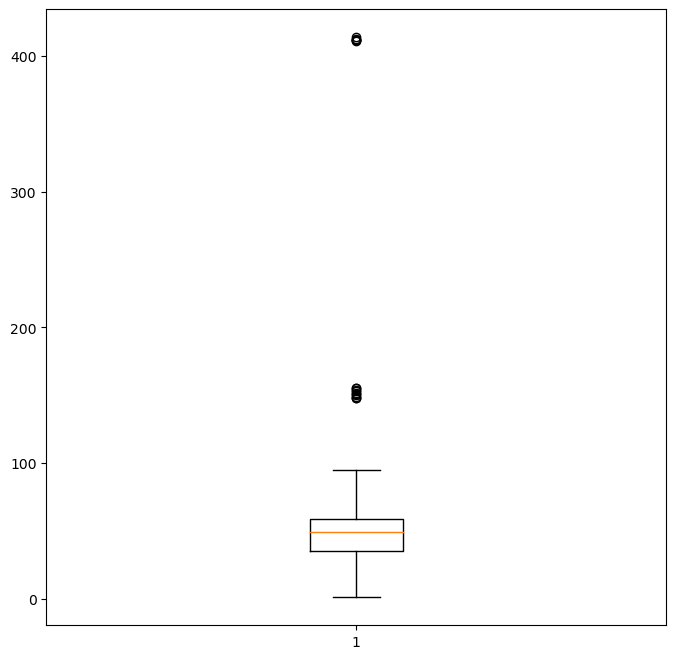

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(age)
plt.show()

In [18]:
gender.value_counts()

M    63340
F    48780
Name: Patient Gender, dtype: int64

In [19]:
view_position.value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

## Splitting the labels

In [50]:
label_classes: List[str] = ['No Finding', 'Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']
data_labels = data['Finding Labels']

In [51]:
def create_label_vector(data_labels: pd.DataFrame, label_classes: List[str]):
    n: int = len(data_labels)
    c: int = len(label_classes)

    label_vector: np.array = np.zeros(shape=(n, c), dtype=int)

    for i, labels in enumerate(data_labels):
        split_label = labels.split('|')

        for l in split_label:
            label_vector[i, label_classes.index(l)] = 1
    return label_vector

In [52]:
label_vector = create_label_vector(data_labels=data_labels, label_classes=label_classes)

In [53]:
def extend_data_table(data: pd.DataFrame,  label_classes: List[str], label_vector: np.array):
    data = data.copy(deep=True)
    for i, label_class in enumerate(label_classes):
        data[label_class] = label_vector[:, i]

    return data

In [54]:
extended_data = extend_data_table(data=data, label_classes=label_classes, label_vector=label_vector)

In [57]:
extended_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,1,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,1,0,0,0,0,1,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,1,0,0,1,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0


In [56]:
extended_data.to_pickle('./data/Data_Entry_extended.pkl')
extended_data.to_csv('./data/Data_Entry_extended.csv')

## Explore images

In [59]:
image = cv2.imread('./data/images/00000001_000.png')

In [61]:
resized_img = cv2.resize(image, dsize=(224, 224))

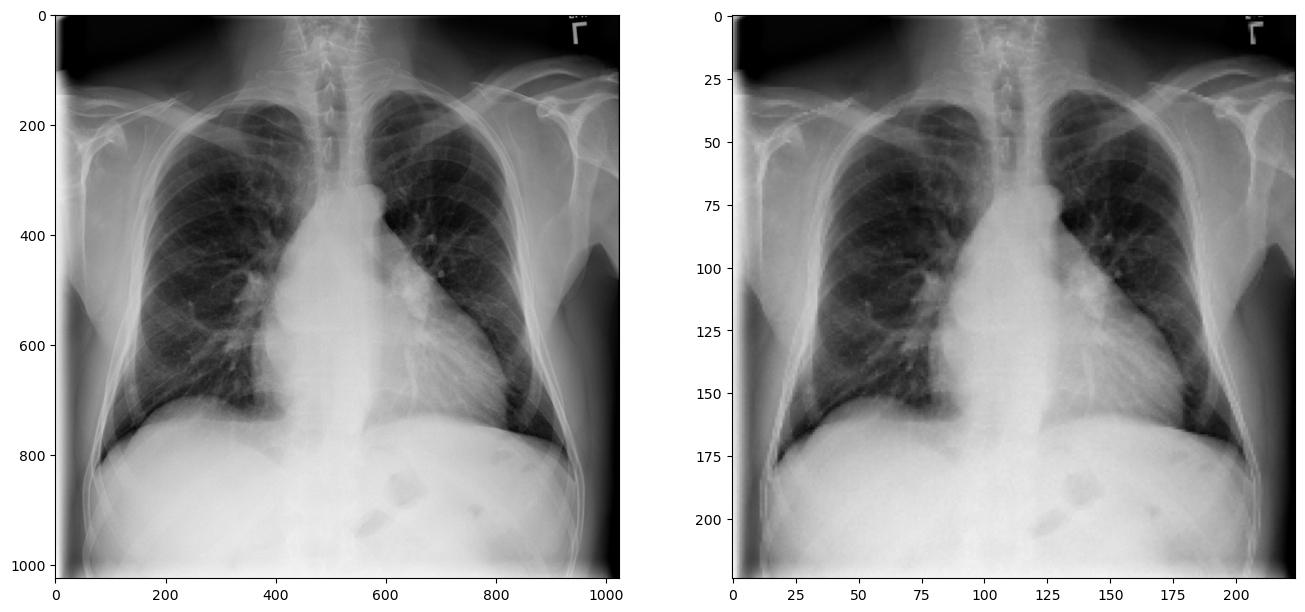

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(image)
axs[1].imshow(resized_img)
plt.show()

In [82]:
def resize_all_image_in_path(path: str, resized_path: str = './data/resized_images'):
    if not os.path.exists(path):
        print('Path does not exist')

    if not os.path.exists(resized_path):
        os.makedirs(resized_path)

    files: List[str] = os.listdir(path)

    for file_name in files:
        file_name: str

        if file_name.endswith('.png'):
            original_file_path = os.path.join(path, file_name)
            new_file_path = os.path.join(resized_path, file_name)

            image = cv2.imread(original_file_path)
            resized_img = cv2.resize(image, dsize=(224, 224))
            cv2.imwrite(new_file_path, resized_img)
            return

In [83]:
resize_all_image_in_path('./data/images/')

In [88]:
def check_shape():
    files: List[str] = os.listdir('./data/images/')

    for file_name in files:
        file_name: str

        if file_name.endswith('.png'):
            img = cv2.imread(os.path.join('./data/images', file_name))
            if img.shape != (1024, 1024, 3):
                print(f'Wrong shape: {img.shape}')

In [89]:
check_shape()

In [99]:
tmp = cv2.imread('./data/resized_images/00000001_000.png')

In [100]:
tmp[:, :, 2]

array([[194, 186, 174, ...,   5,   5,   4],
       [183, 172, 119, ...,   4,   5,   4],
       [165, 119,  57, ...,   4,   5,   4],
       ...,
       [255, 232, 184, ...,   0,   0,   0],
       [254, 232, 186, ...,   4,   0,   0],
       [255, 232, 185, ...,  13,   0,   0]], dtype=uint8)

In [95]:
tmp = cv2.imread('./data/images/00000001_000.png')
tmp

array([[[202, 202, 202],
        [199, 199, 199],
        [195, 195, 195],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[199, 199, 199],
        [196, 196, 196],
        [195, 195, 195],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[196, 196, 196],
        [194, 194, 194],
        [193, 193, 193],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [98]:
tmp[:, :, 2]

array([[202, 199, 195, ...,   5,   2,   0],
       [199, 196, 195, ...,   5,   2,   0],
       [196, 194, 193, ...,   5,   2,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 254, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)